<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#045F5F"> <b>Machine Learning (Fall 2024)</b><br><br>Hands-On 2</i></font></h1>
            </td>
            <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
            </td>
        </tr>
        </table>
    
</div>
<br>
<font size=3 color="#045F5F">Amirhossein Yousefvand<br></font><br>

# Discriminant Function:

<img src="img/discriminantFunction.png" />


### Multivariate Normal Distribution:

<img src="img/MND.png" />


### Discriminant Function of Multivariate Normal Distribution:

<img src="img/DFMND.png" />


## Generate Samples for Classes:

In [13]:
import numpy as np

mu1 = np.array([1, 4])
sigma1 = np.array([[4, 3], [0, 1]])

mu2 = np.array([4, 3])
sigma2 = np.array([[2, 0], [1, 1]])

samples_C1 = np.random.multivariate_normal(mu1, sigma1, 100)
samples_C2 = np.random.multivariate_normal(mu2, sigma2, 100)


<ipython-input-13-34a9b2e9e33f>:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_C1 = np.random.multivariate_normal(mu1, sigma1, 100)
<ipython-input-13-34a9b2e9e33f>:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_C2 = np.random.multivariate_normal(mu2, sigma2, 100)


## Plot Samples:

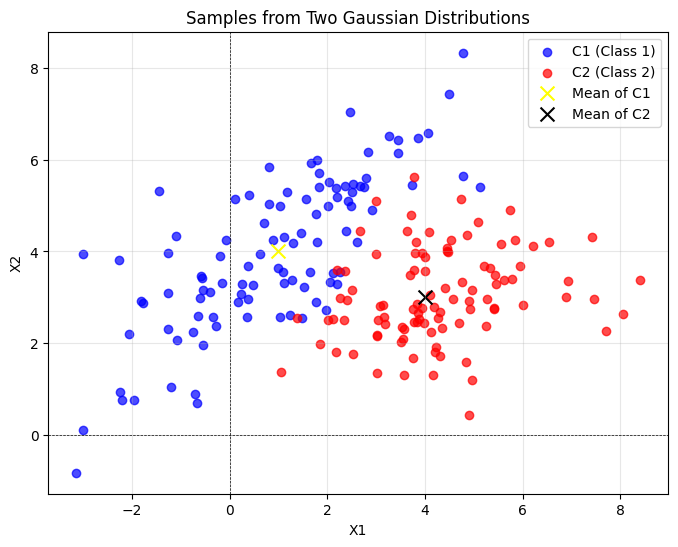

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(samples_C1[:, 0], samples_C1[:, 1], label="C1 (Class 1)", alpha=0.7, c='blue')
plt.scatter(samples_C2[:, 0], samples_C2[:, 1], label="C2 (Class 2)", alpha=0.7, c='red')

plt.scatter(mu1[0], mu1[1], color='yellow', marker='x', s=100, label="Mean of C1")
plt.scatter(mu2[0], mu2[1], color='black', marker='x', s=100, label="Mean of C2")

plt.title("Samples from Two Gaussian Distributions")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Discriminant Function:

In [15]:
def discriminant_function(x, mu, sigma, prior):
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    term1 = -0.5 * np.log(sigma_det)  # Log determinant term
    term2 = -0.5 * np.einsum('ij,ij->i', (x - mu) @ sigma_inv, (x - mu))  # Mahalanobis distance term
    term3 = np.log(prior)  # Prior probability
    return term1 + term2 + term3

prior1 = 0.5
prior2 = 0.5

x, y = np.linspace(-2, 8, 300), np.linspace(-2, 8, 300)
X, Y = np.meshgrid(x, y)
grid_points = np.c_[X.ravel(), Y.ravel()]

g1 = discriminant_function(grid_points, mu1, sigma1, prior1)
g2 = discriminant_function(grid_points, mu2, sigma2, prior2)

## Decision Boundary:

In [16]:
# Reshape discriminant values to match the grid
G1 = g1.reshape(X.shape)
G2 = g2.reshape(X.shape)

# Decision boundary is where g1 = g2 (g1 - g2 = 0)
decision_boundary = G1 - G2

## Plot Decision Boundary:

<ipython-input-17-58c903d9b3cd>:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, decision_boundary, levels=[0], colors='green', linewidths=2, linestyles="--", label="Decision Boundary")


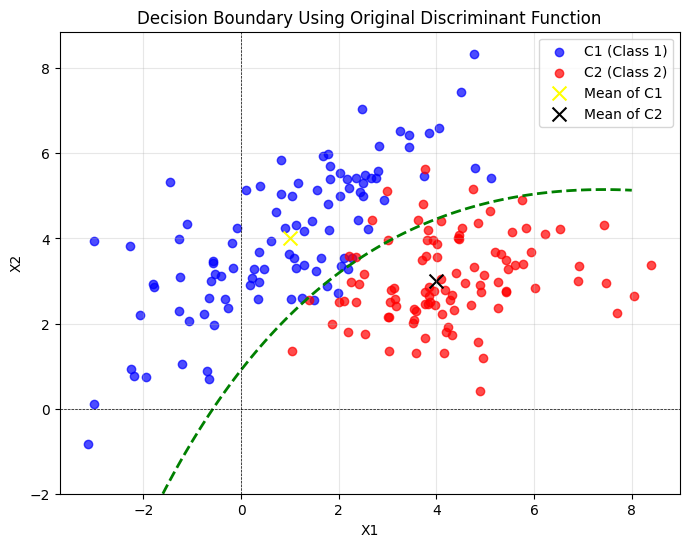

In [17]:

plt.figure(figsize=(8, 6))
plt.contour(X, Y, decision_boundary, levels=[0], colors='green', linewidths=2, linestyles="--", label="Decision Boundary")
plt.scatter(samples_C1[:, 0], samples_C1[:, 1], label="C1 (Class 1)", alpha=0.7, c='blue')
plt.scatter(samples_C2[:, 0], samples_C2[:, 1], label="C2 (Class 2)", alpha=0.7, c='red')

plt.scatter(mu1[0], mu1[1], color='yellow', marker='x', s=100, label="Mean of C1")
plt.scatter(mu2[0], mu2[1], color='black', marker='x', s=100, label="Mean of C2")

plt.title("Decision Boundary Using Original Discriminant Function")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Various Prior Probabilities:

In [18]:
prior1 = 0.1
prior2 = 0.9

g1 = discriminant_function(grid_points, mu1, sigma1, prior1)
g2 = discriminant_function(grid_points, mu2, sigma2, prior2)

G1 = g1.reshape(X.shape)
G2 = g2.reshape(X.shape)

decision_boundary_1 = G1 - G2

prior1 = 0.9
prior2 = 0.1

g1 = discriminant_function(grid_points, mu1, sigma1, prior1)
g2 = discriminant_function(grid_points, mu2, sigma2, prior2)

G1 = g1.reshape(X.shape)
G2 = g2.reshape(X.shape)

decision_boundary_2 = G1 - G2

## Plot Decision Boundary with Various Prior Probabilities:

<ipython-input-19-87f5956c724b>:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, decision_boundary, levels=[0], colors='yellow', linewidths=2, linestyles="--", label="Decision Boundary")
<ipython-input-19-87f5956c724b>:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, decision_boundary_1, levels=[0], colors='green', linewidths=2, linestyles="--", label="Decision Boundary")
<ipython-input-19-87f5956c724b>:4: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, decision_boundary_2, levels=[0], colors='black', linewidths=2, linestyles="--", label="Decision Boundary")


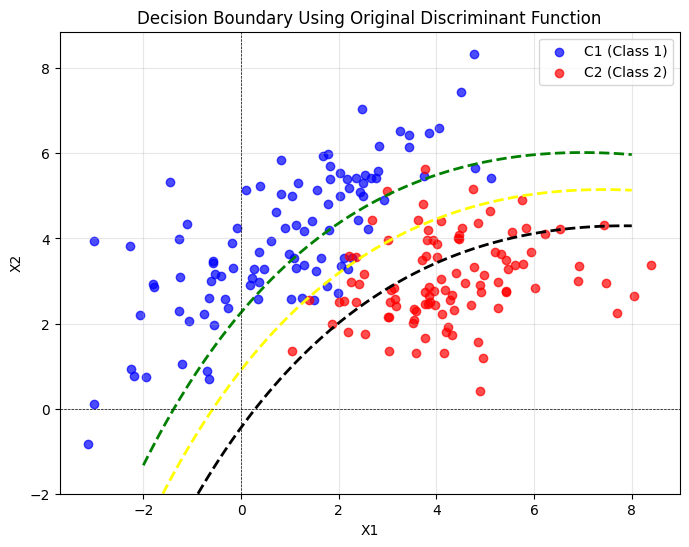

In [19]:

plt.figure(figsize=(8, 6))
plt.contour(X, Y, decision_boundary, levels=[0], colors='yellow', linewidths=2, linestyles="--", label="Decision Boundary")
plt.contour(X, Y, decision_boundary_1, levels=[0], colors='green', linewidths=2, linestyles="--", label="Decision Boundary")
plt.contour(X, Y, decision_boundary_2, levels=[0], colors='black', linewidths=2, linestyles="--", label="Decision Boundary")

plt.scatter(samples_C1[:, 0], samples_C1[:, 1], label="C1 (Class 1)", alpha=0.7, c='blue')
plt.scatter(samples_C2[:, 0], samples_C2[:, 1], label="C2 (Class 2)", alpha=0.7, c='red')

plt.title("Decision Boundary Using Original Discriminant Function")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## ROC Curve:

### Cutoff Point (threshold):

<img src="img/ROC1.png" >
<img src="img/ROC2.png" >
<img src="img/ROC3.png" />


### ROC:

#### What it Represents: 
The ROC curve shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) as the decision threshold is varied.
#### Purpose: 
It evaluates the classifier's performance across all possible thresholds, providing insights into its ability to distinguish between the two classes.
#### AUC (Area Under Curve): 
The area under the ROC curve summarizes the classifier's ability to discriminate between the classes. An AUC of:
 - 1.0 means perfect discrimination.
 - 0.5 means the classifier performs no better than random guessing.
#### Threshold Dependent: 
The ROC curve does not rely on a fixed threshold; instead, it varies the threshold continuously.

<img src="img/ROC4.png" />


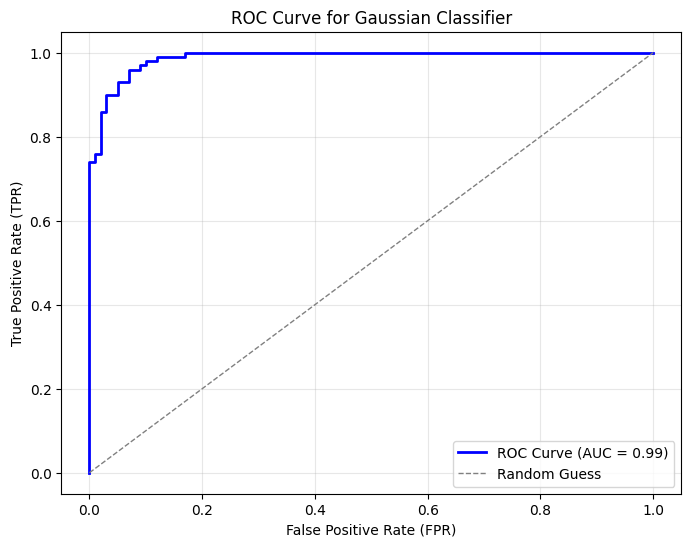

In [20]:
from sklearn.metrics import roc_curve, auc

samples = np.vstack((samples_C1, samples_C2))
labels = np.hstack((np.ones(samples_C1.shape[0]), np.zeros(samples_C2.shape[0])))  # 1 for C1, 0 for C2

prior1 = 0.5
prior2 = 0.5

g1 = discriminant_function(samples, mu1, sigma1, prior1)
g2 = discriminant_function(samples, mu2, sigma2, prior2)

scores = g1 - g2

fpr, tpr, thresholds = roc_curve(labels, scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label="Random Guess")
plt.title("ROC Curve for Gaussian Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
